In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tms_col = ["TOC_VU","PH_VU","SS_VU","FLUX_VU","TN_VU","TP_VU"]
flow_col = ["flow_TankA", "flow_TankB", "level_TankA", "level_TankB"]

In [3]:
tms_acutal_dir = "../../data/actual/TMS_Actual.csv"
flow_acutal_dir = "../../data/actual/FLOW_Actual.csv"

In [6]:
tms = pd.read_csv(tms_acutal_dir)
flow = pd.read_csv(flow_acutal_dir)

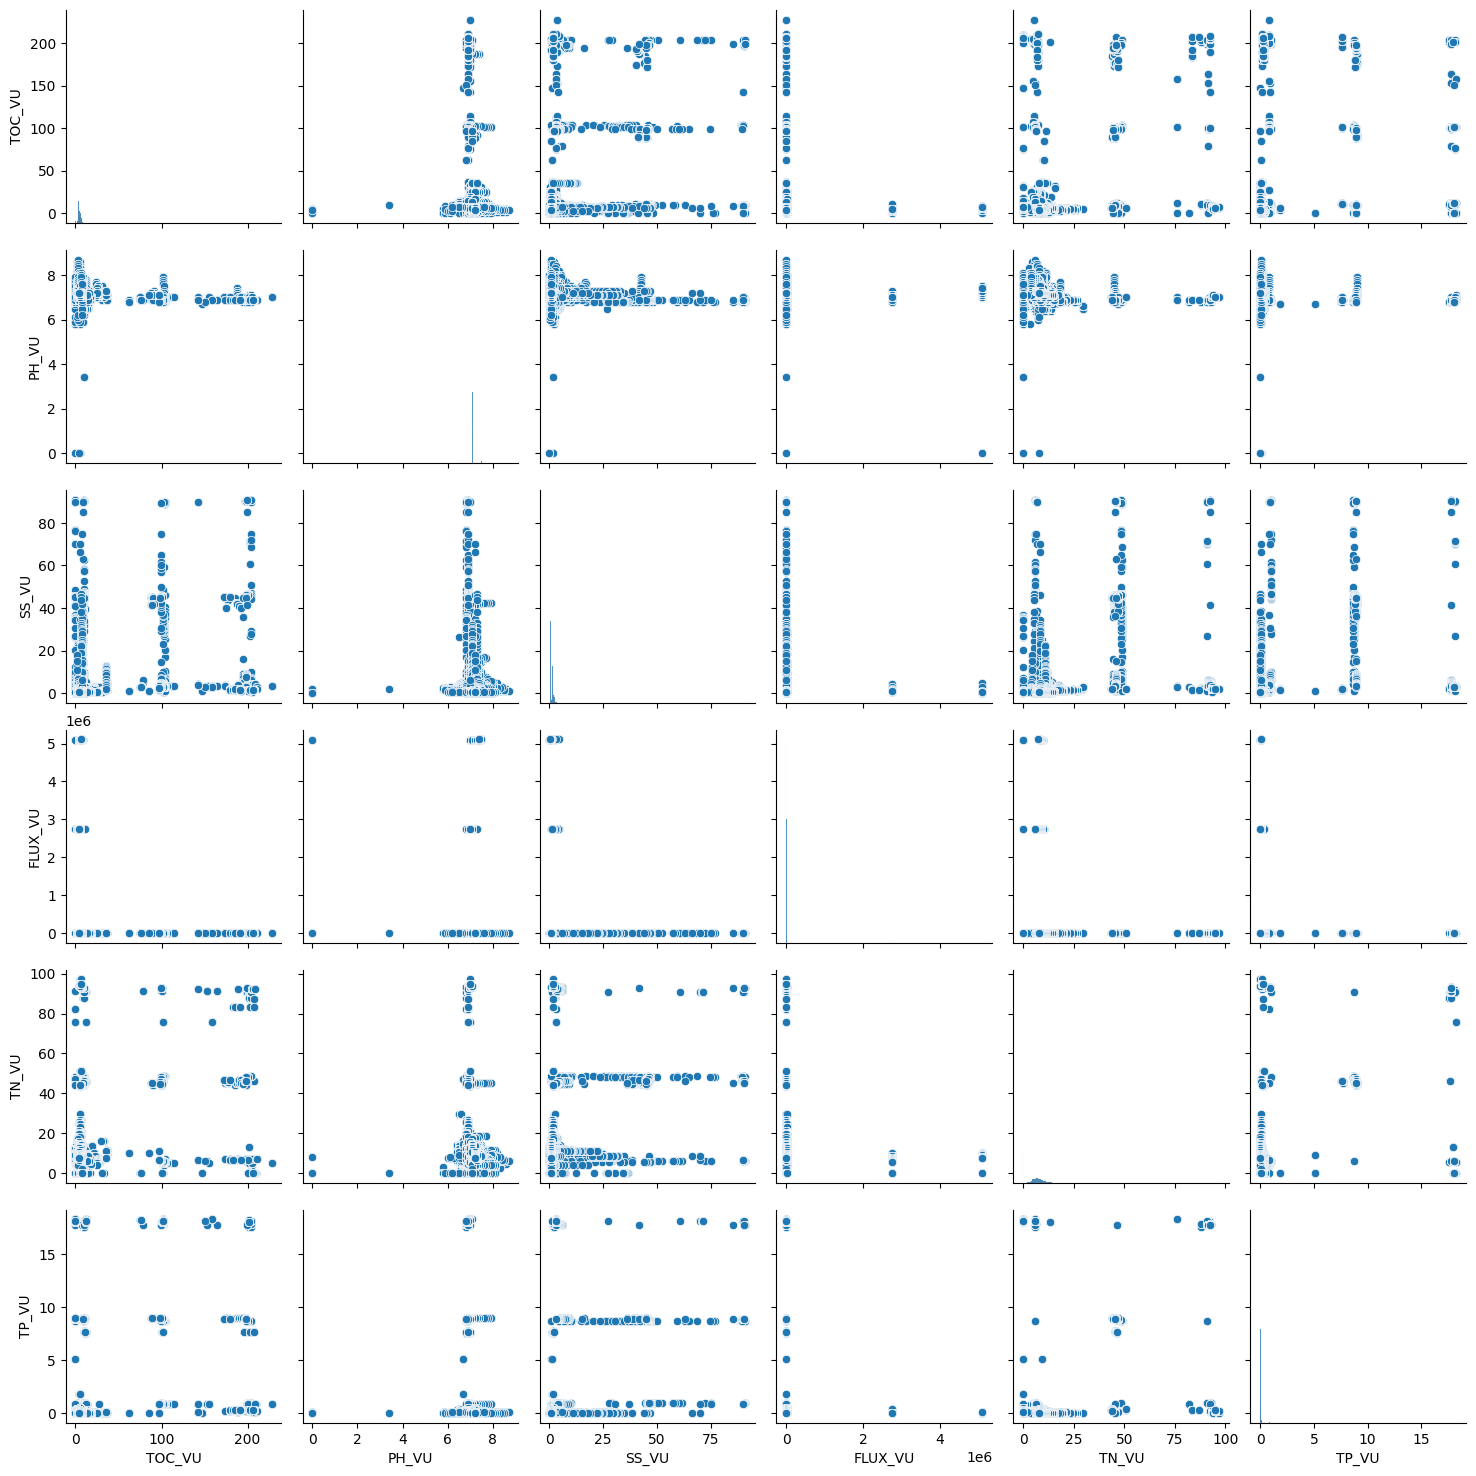

In [8]:
sns.pairplot(tms[tms_col].dropna(), diag_kind="hist")

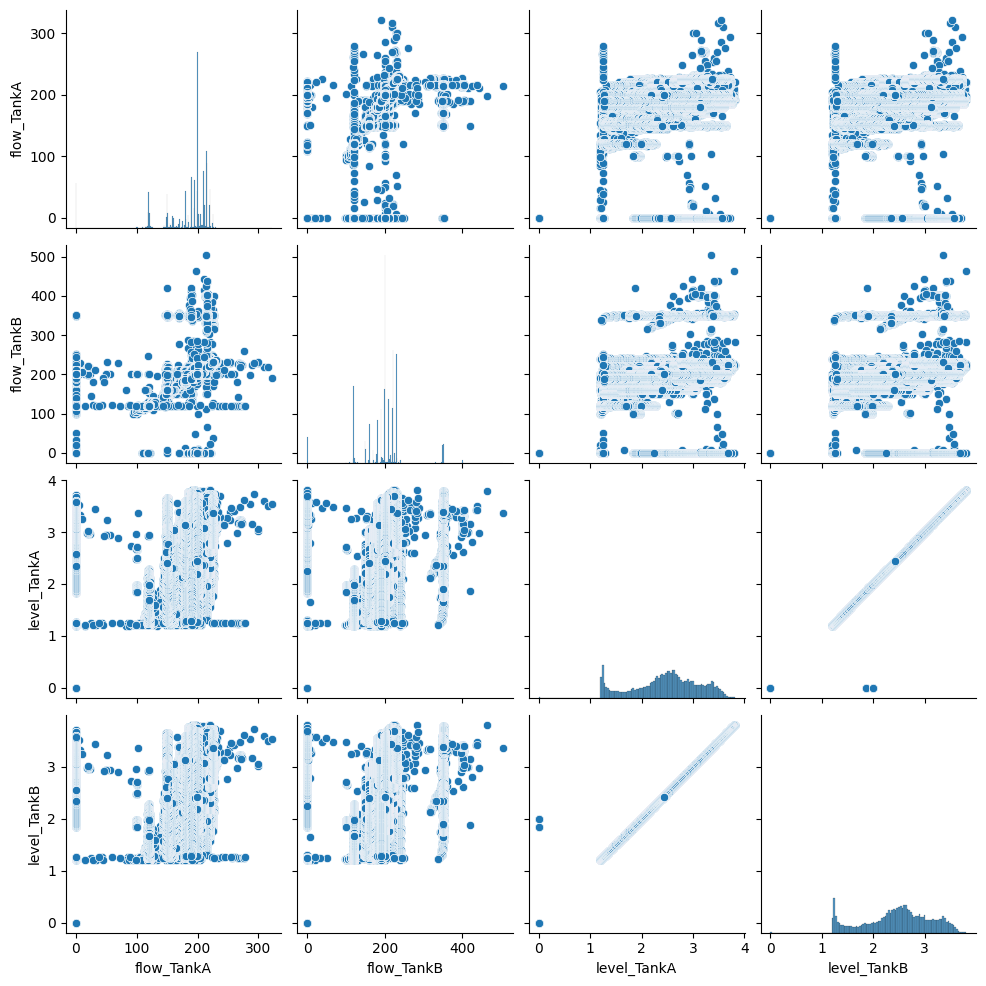

In [9]:
sns.pairplot(flow[flow_col].dropna(), diag_kind="hist")

In [11]:
def corr_matrix(
    df,
    cols,
    method = "pearson",      # "pearson" | "spearman" | "kendall"
    dropna = "pairwise",     # "pairwise" | "listwise"
    annotate = True,
    title = None,
):
    """
    df      : 원본 데이터프레임
    cols    : 상관을 볼 컬럼 리스트 (None이면 numeric 컬럼 전체)
    method  : 상관계수 종류
    dropna  : pairwise=각 쌍마다 결측 제거(기본), listwise=행 단위로 전부 결측 제거
    """
    if cols is None:
        X = df.select_dtypes(include=[np.number]).copy()
    else:
        X = df[cols].copy()

    if dropna == "listwise":
        X = X.dropna(axis=0, how="any")

    corr = X.corr(method=method)  # pairwise는 pandas 기본 동작(쌍별 결측 제거)

    # --- plot (matplotlib only) ---
    fig, ax = plt.subplots(figsize=(1 + 0.6 * len(corr.columns), 1 + 0.6 * len(corr.columns)))
    im = ax.imshow(corr.values)

    ax.set_xticks(np.arange(len(corr.columns)))
    ax.set_yticks(np.arange(len(corr.columns)))
    ax.set_xticklabels(corr.columns, rotation=45, ha="right")
    ax.set_yticklabels(corr.columns)

    if annotate:
        for i in range(corr.shape[0]):
            for j in range(corr.shape[1]):
                ax.text(j, i, f"{corr.iat[i, j]:.2f}", ha="center", va="center")

    ax.set_title(title or f"Correlation matrix ({method})")
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    plt.tight_layout()
    plt.show()

    return corr

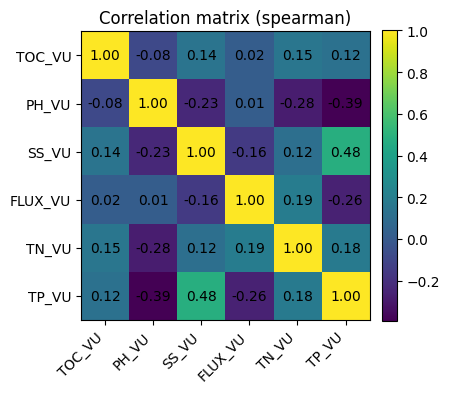

In [20]:
corr = corr_matrix(tms, cols=tms_col, method="spearman", dropna="pairwise")

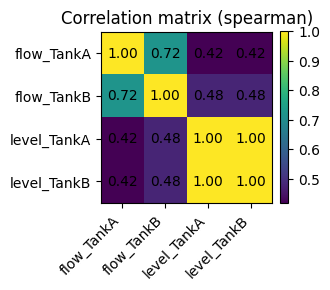

In [15]:
corr = corr_matrix(flow, cols=flow_col, method="spearman", dropna="pairwise")